# Wine Quality Prediction



## Project Topic
The goal of the project is to develop a model that can predict the wine quality based upon an group of inputs of chemcial characteristics of the wine given in the data set.  Such a model could be used by producer of wine to help determine which characteritics of wine to focus on in order to maximize the quality of the wine.  It may also be helpfull for consumers of wine to determine which underlying characteristics may lead to a better tasting wine at purchase.


## Data source

The below project is based upon a wine database from Kagle (https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009/data).  The data set contains information related to red variants of the Portuguese "Vinho Verde" wine and include chemical characteristics of the wine together with a wine quality rating.


In [1]:
#Importing required packages.
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [2]:
#Loading dataset
wine = pd.read_csv('winequality-red.csv')

## Data Overview

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
print (wine.shape)

(1599, 12)


In [6]:
print(wine.isnull().values.any())
print(wine.isna().values.any())

False
False


In [7]:
wine[wine.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


### Summary
The data is numeric (either floating or integers)

The data is composed of 1,599 data points with 12 dimensions including one target dimension (quality)

There are no null or na values in the dataset indicating that the data is relatively clean

There are however 240 duplicated records that will be addressed in the below data cleaning step



## Data Cleaning

In [8]:
wine.drop_duplicates(inplace=True)
wine.reset_index(drop=True)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1354,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1355,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1356,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1357,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [9]:
wine.columns = [col.replace(" ", "_") for col in wine.columns]

In [10]:
print (wine.shape)

(1359, 12)


## Exploratory Data Analysis (EDA)

In [11]:
wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,1359.0,8.310596,1.736990,4.60000,7.1000,7.9000,9.20000,15.90000
volatile_acidity,1359.0,0.529478,0.183031,0.12000,0.3900,0.5200,0.64000,1.58000
citric_acid,1359.0,0.272333,0.195537,0.00000,0.0900,0.2600,0.43000,1.00000
residual_sugar,1359.0,2.523400,1.352314,0.90000,1.9000,2.2000,2.60000,15.50000
chlorides,1359.0,0.088124,0.049377,0.01200,0.0700,0.0790,0.09100,0.61100
free_sulfur_dioxide,1359.0,15.893304,10.447270,1.00000,7.0000,14.0000,21.00000,72.00000
total_sulfur_dioxide,1359.0,46.825975,33.408946,6.00000,22.0000,38.0000,63.00000,289.00000
density,1359.0,0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369
pH,1359.0,3.309787,0.155036,2.74000,3.2100,3.3100,3.40000,4.01000
sulphates,1359.0,0.658705,0.170667,0.33000,0.5500,0.6200,0.73000,2.00000


### Data Distribution

In [12]:
col_name = [col for col in wine.columns]
col_name

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

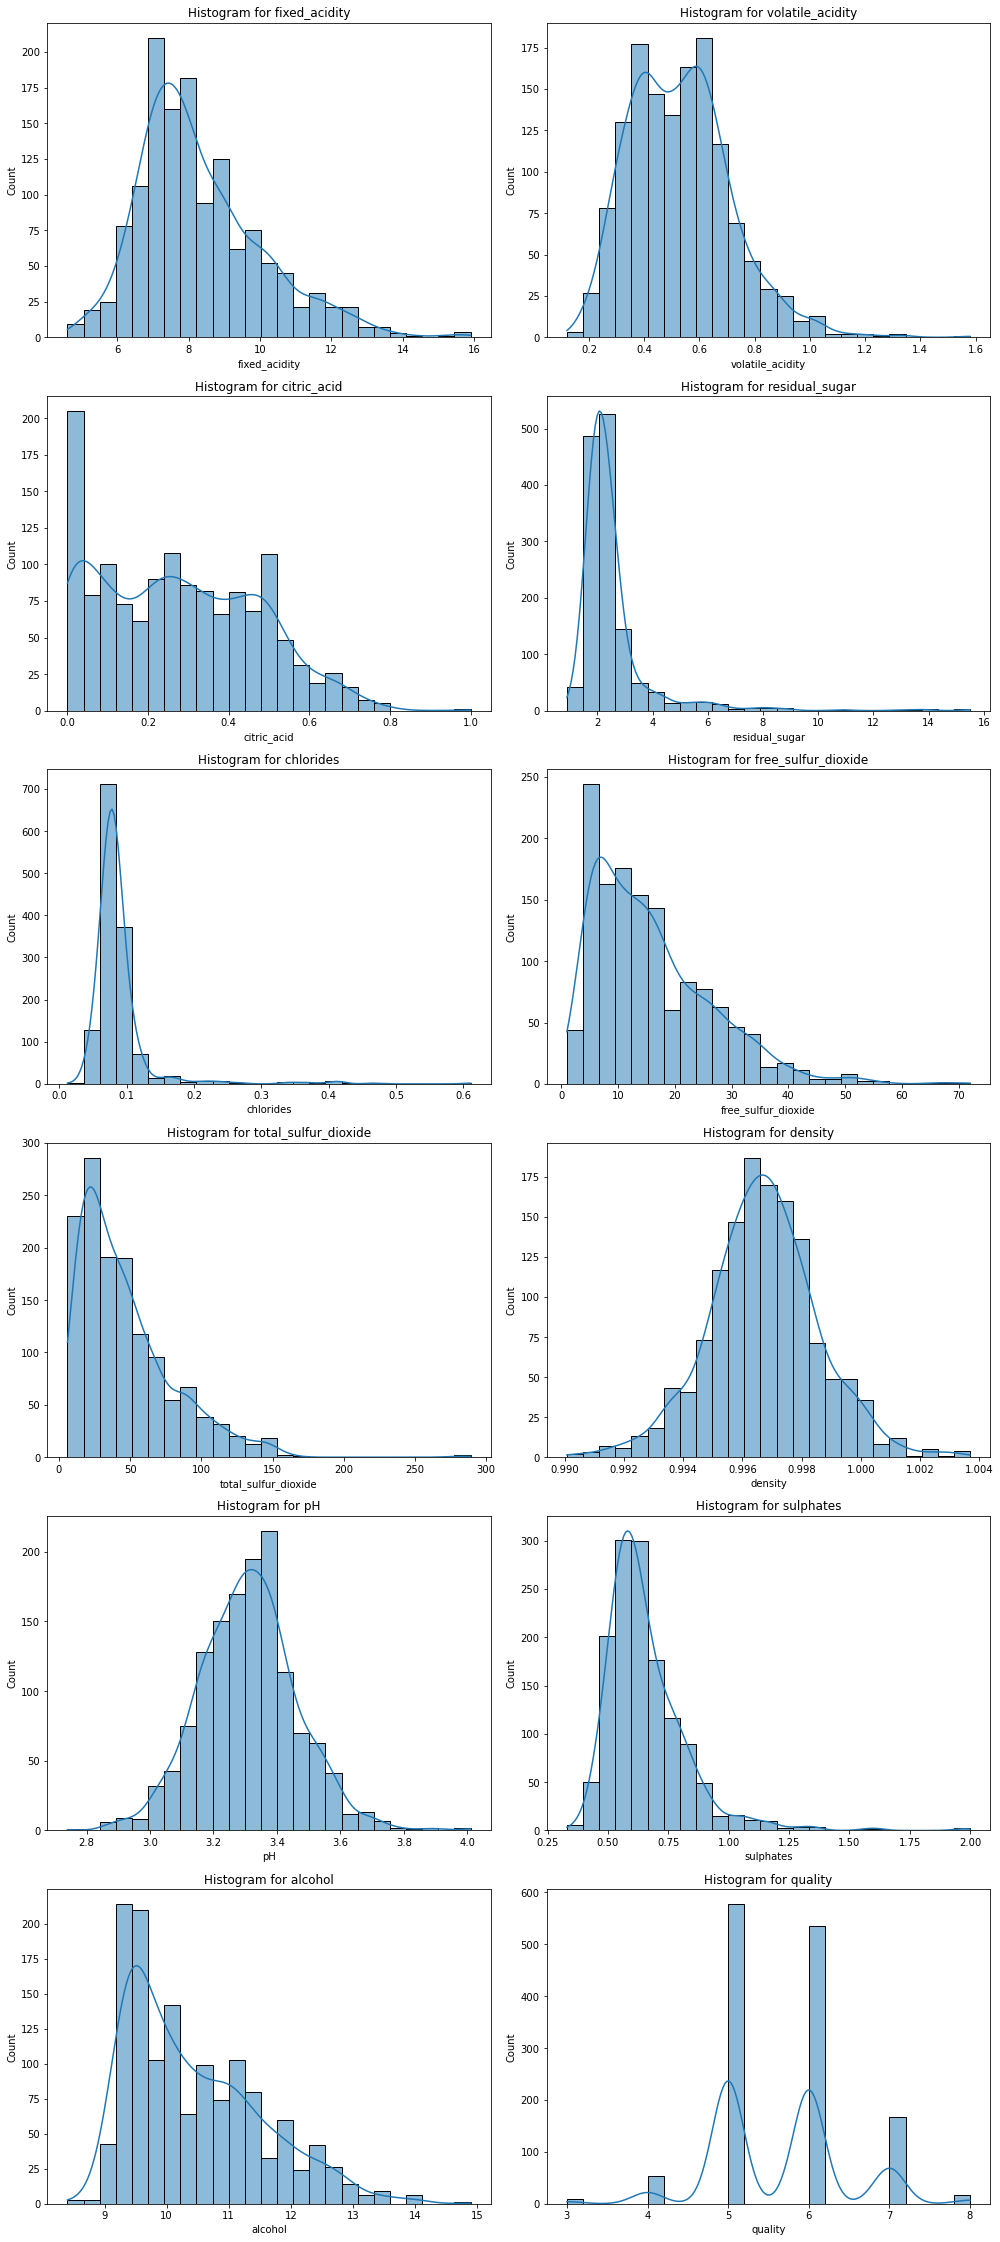

In [13]:
plt.figure(figsize=(14,len(col_name)*3))
for idx,column in enumerate(col_name):
    plt.subplot(len(col_name)//2+1,2,idx+1)
    sns.histplot(x=column, data=wine,bins=25,kde=True)
    plt.title("Histogram for "+column)
    plt.tight_layout()

Based upon the above charts it appears that fixed_acidity, ph and density have a relatively normal distribution.  However the remaining varialbes do not.

There may be some outliers in some of the fields such as sulphates, sulfur_dioxide and chlorides that should be considered further in modelling.

Finally, as can be seen there are very few data points in the extreme levels 3 and 8, thus it may make sense to condolidate the quality category into a low (3,4) medium (5) a medium (6) and high (7,8) quality category.  This still will be performed in as part of pre-processing in the model building section.

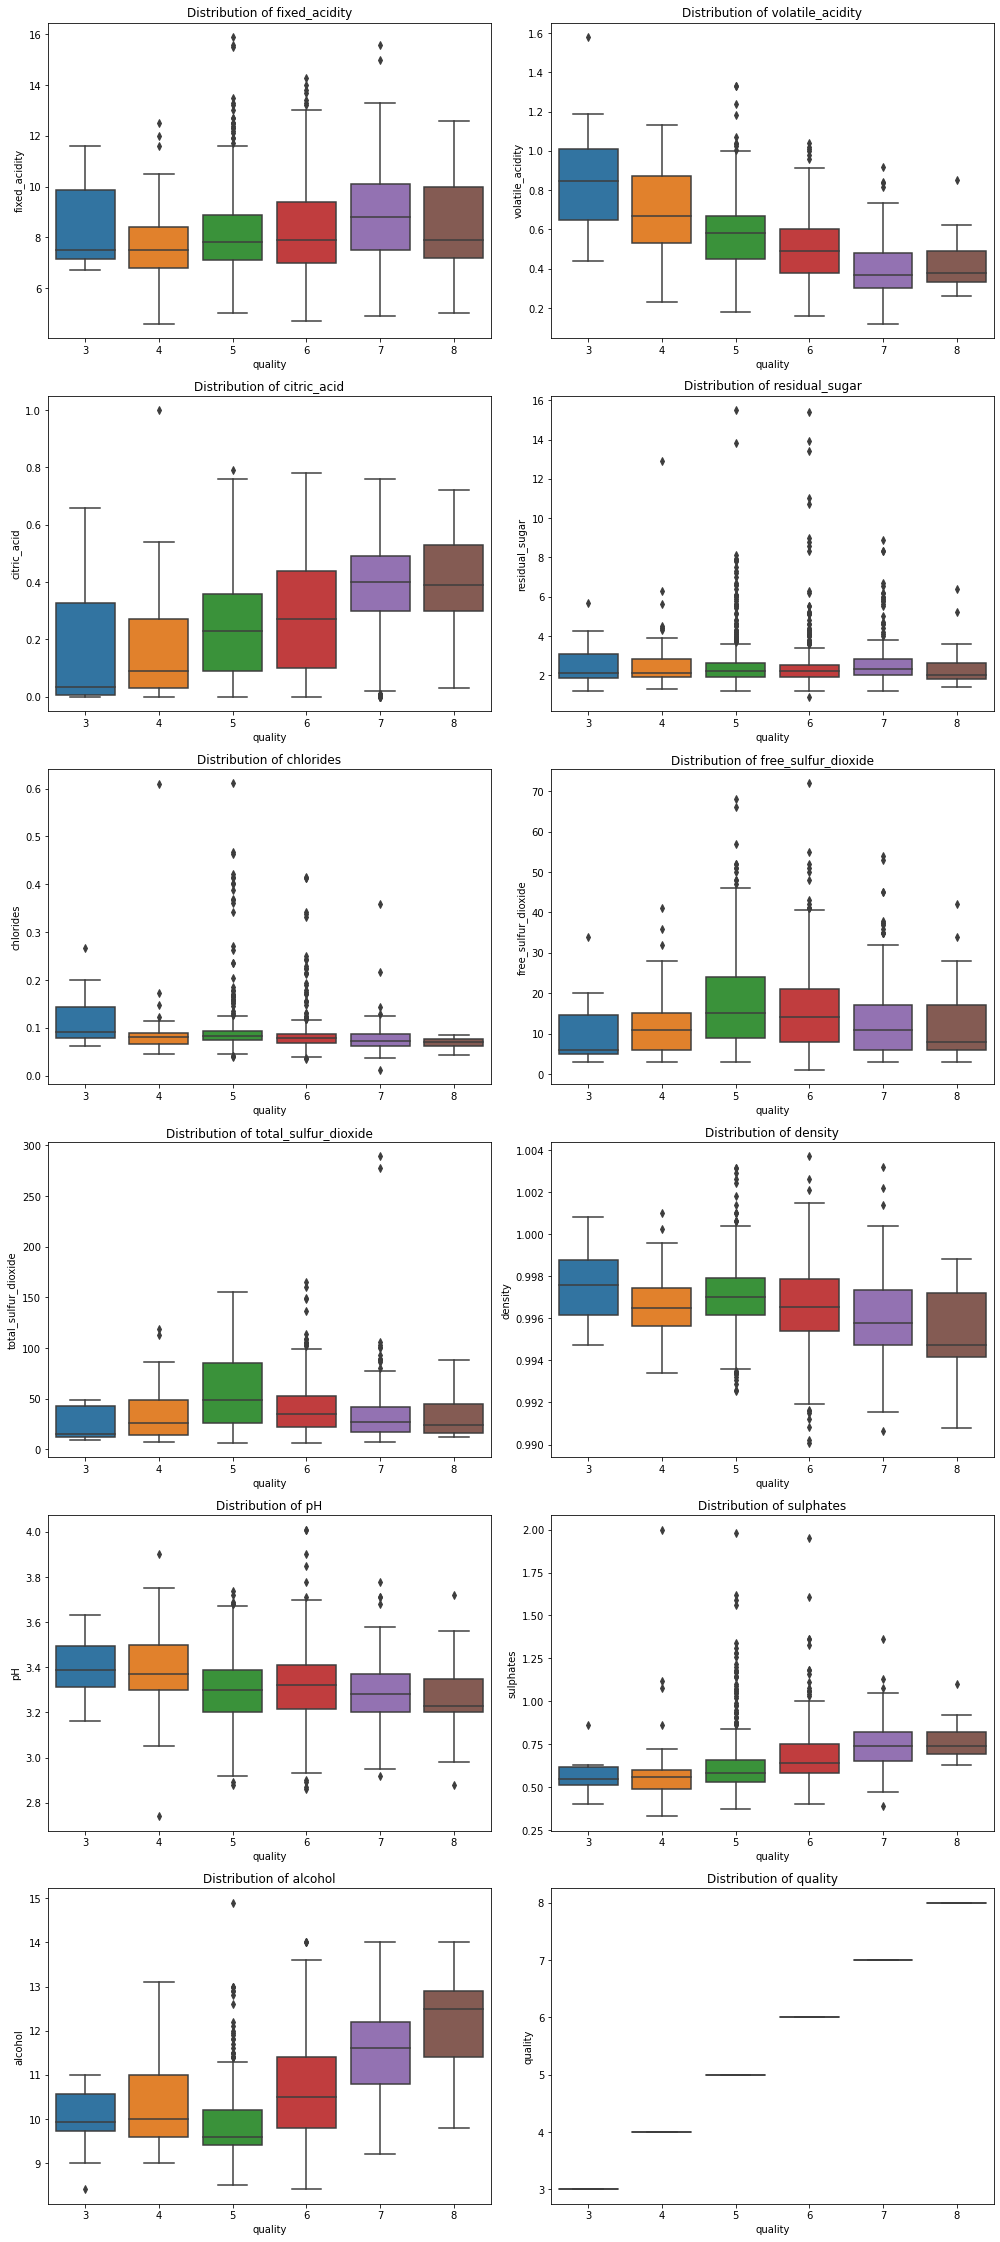

In [14]:
plt.figure(figsize=(14,len(col_name)*3))
for idx,column in enumerate(col_name):
    plt.subplot(len(col_name)//2+1,2,idx+1)
    sns.boxplot(x="quality", y=column, data=wine)
    plt.title("Distribution of "+column)
    plt.tight_layout()

The above charts indicate that predictor variables in most cases appear to be differenciated for the quality levels indicating a potential correlation.

Distribution of data point above also indicate that some individual outliers may exist, once more for consideration in the modelling phase.

### Cross correlations and covariance analysis

In [15]:
wine.corr().T

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile_acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric_acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual_sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free_sulfur_dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total_sulfur_dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


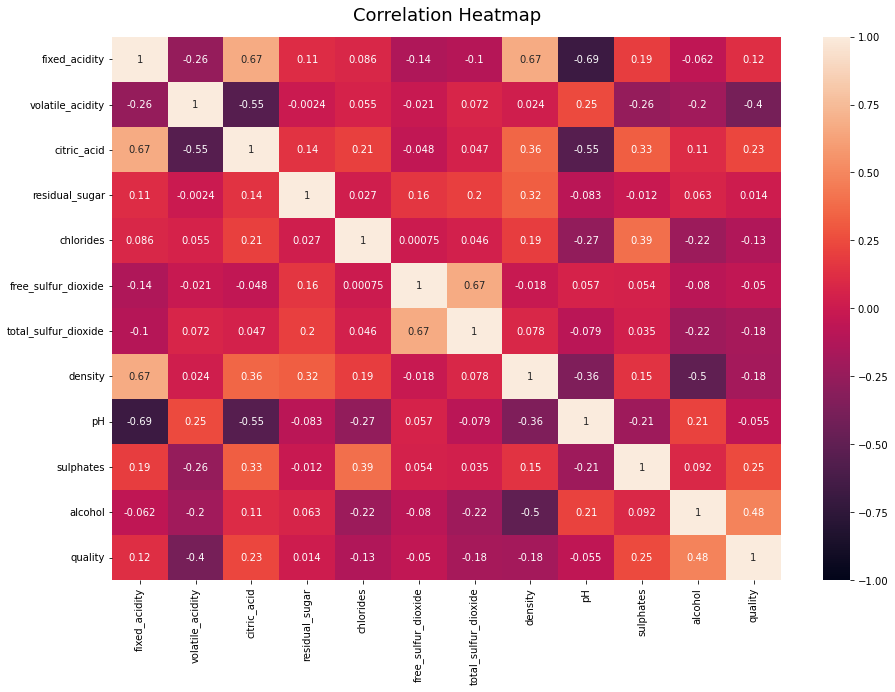

In [16]:
plt.figure(figsize=(15,10))
heatmap = sns.heatmap(wine.corr(),  vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16);
plt.show()

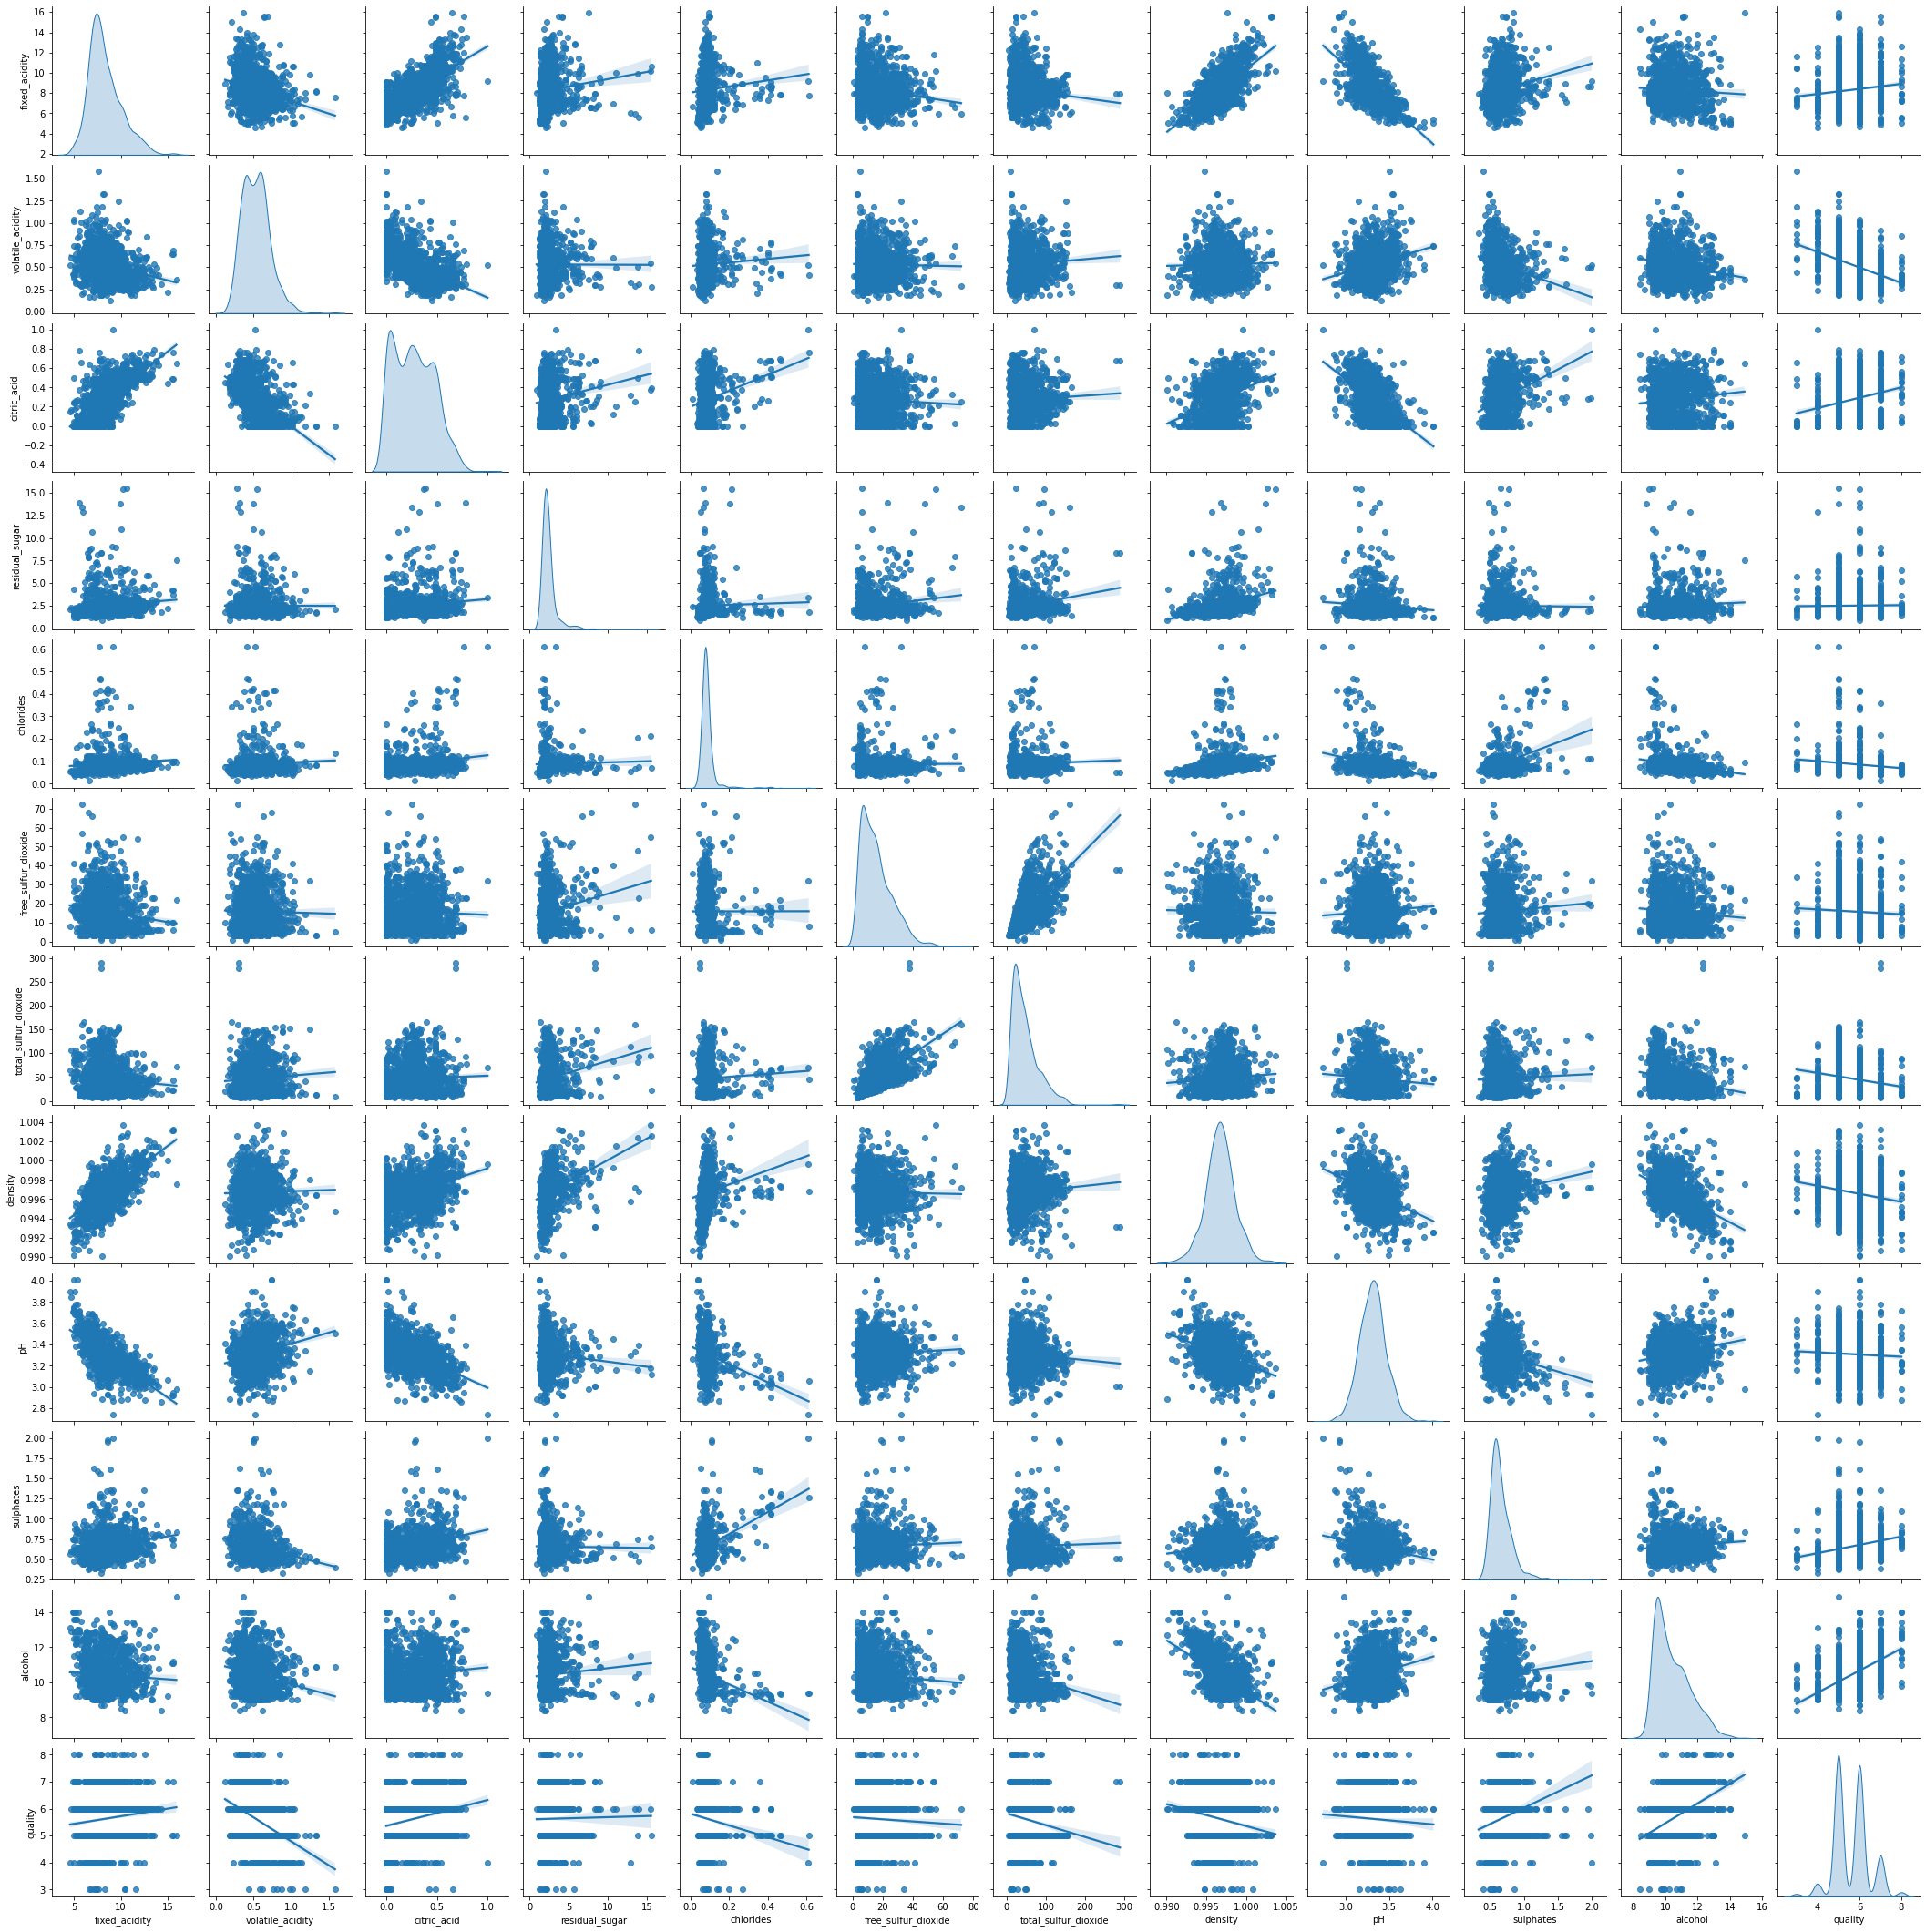

In [17]:
sns.pairplot(wine, kind='reg', diag_kind='kde')

The charts above indicate that there may be some multicollinearity.  In particular
* fixed_acidity and ph, density and citric_acid as well as 
* free_sulfer_dioxide and total_sulfer_dioxide.

The factors again may be considered further during model building.
    

### Summary

## Develop Model

### Feature Engineering
Before developing the model a few feature adjustments will made
* The first is realted to the sparcity of data in categories 3,4 and 7,8 as found in the EDA.  The compensate for this categories 3 and 4 which are the lowest ratings will be combined into one catagory and the same will be done for 7,8, the hightest
* As noted in the EDA, there appears to be some multicollinearity, therefore some of these features will be modified to reduce the risk associated with thisw

In [18]:
wine["quality_range"] = pd.cut(wine["quality"], 
                                 bins=[-np.inf, 4, 5,6, np.inf], 
                                 labels=[1,2,3,4])
# 1 = poor wine
# 2 = below average wine
# 3 = average wine
# 4 = above average wine
print (wine["quality"].value_counts())
print (wine["quality_range"].value_counts())

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64
2    577
3    535
4    184
1     63
Name: quality_range, dtype: int64


In [19]:
# Feature Engineering to address multicollinearity of
# fixed_acidity and ph,
# free_sulfer_dioxide and total_sulfer_dioxid

wine['sulfur_dioxide'] = wine['total_sulfur_dioxide'] + wine['free_sulfur_dioxide']
wine = wine.drop(["total_sulfur_dioxide","free_sulfur_dioxide"], axis=1)

In [20]:
wine['PHToAcidityRatio'] = wine['pH'] / wine['fixed_acidity']
wine = wine.drop(["pH","fixed_acidity"], axis=1)

### Split data into test and training set
20% of the data will be held back for testing

In [21]:
X = wine.drop(["quality","quality_range"], axis=1)
y = wine["quality_range"]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state = 1)

### Standardize the data
Standardizing is a process to center the values at 0 with a standard deviation of 1 and should be considered when comparing measurements that have different units such as this data set. This will help ensure that variables measured at different scales do not end up creating a bais. As was noted above, the dataset is primarily not normally distributed therefore the'MinMaxScaler' method was selected for normilization.   This method transforms features by scaling each feature to a given range.

In [22]:
norm = MinMaxScaler(feature_range = (0, 1))
norm.fit(X_train)
x_train = norm.transform(X_train)
x_test = norm.transform(X_test)

### Build Models
The following models will be considered:

    - K-Nearest Neighbors (KNN) Model
    
    

#### K-Nearest Neighbors (KNN) Model

In [23]:
knn = KNeighborsClassifier()
knn_params = {"n_neighbors": np.arange(2, 50),
             "weights": ["uniform", "distance"],
             "leaf_size": [25, 30, 25]}

knn_cv_model = GridSearchCV(knn, knn_params, cv = 5)
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [25, 30, 25],
                         'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']})

In [24]:
print("Best score for train set: " + str(knn_cv_model.best_score_))

print("____________________________________________")

print("best K value: " + str(knn_cv_model.best_params_["n_neighbors"]),
     "\nbest weights: " + knn_cv_model.best_params_["weights"],
     "\nbest leaf size: " + str(knn_cv_model.best_params_["leaf_size"]))

Best score for train set: 0.5318748188930746
____________________________________________
best K value: 7 
best weights: distance 
best leaf size: 25


In [25]:
knn_model = KNeighborsClassifier(n_neighbors = knn_cv_model.best_params_["n_neighbors"],
                                leaf_size = knn_cv_model.best_params_["leaf_size"],
                                weights = knn_cv_model.best_params_["weights"])

knn_model.fit(x_train, y_train)

KNeighborsClassifier(leaf_size=25, n_neighbors=7, weights='distance')

In [26]:
y_pred = knn_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.5588235294117647

<AxesSubplot:>

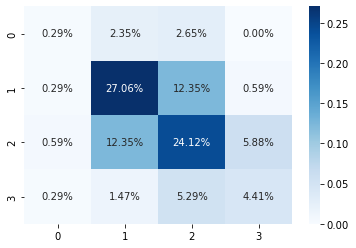

In [27]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

#### Random Forest Classifier

In [28]:
rfc=RandomForestClassifier(random_state=1)
rfc_params = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
rfc_cv_model = GridSearchCV(rfc, rfc_params, cv= 5)
rfc_cv_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [30]:
print("Best score for train set: " + str(rfc_cv_model.best_score_))

print("____________________________________________")

print("best n estimators: " + str(rfc_cv_model.best_params_["n_estimators"]),
      "\nbest max features: " + rfc_cv_model.best_params_["max_features"],
     "\nbest max depth: " + str(rfc_cv_model.best_params_["max_depth"]),
     "\nbest criterion: " + str(rfc_cv_model.best_params_["criterion"]))

Best score for train set: 0.6221336810586303
____________________________________________
best n estimators: 500 
best max features: auto 
best max depth: 5 
best criterion: gini


In [34]:
rfc_model = RandomForestClassifier(n_estimators = rfc_cv_model.best_params_["n_estimators"],
                                max_features = rfc_cv_model.best_params_["max_features"],
                                max_depth = rfc_cv_model.best_params_["max_depth"],
                                criterion = rfc_cv_model.best_params_["criterion"])

rfc_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=500)

In [35]:
y_pred = rfc_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.5588235294117647

<AxesSubplot:>

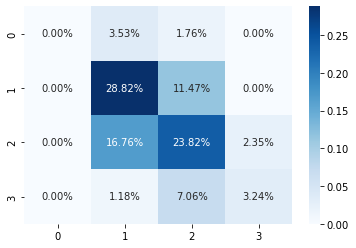

In [36]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

#### Gradient Boosting Machines (GBM) Model

In [ ]:
gbm = GradientBoostingClassifier()
gbm_params = {"learning_rate": [0.005, 0.008, 0.1, 0.15],
              "n_estimators": [80, 100, 150, 200],
              "max_depth": [2, 3, 4],
              "min_samples_split": [2, 3, 4]}

gbm_cv_model = GridSearchCV(gbm, gbm_params, cv = 5)
gbm_cv_model.fit(x_train, y_train)

In [ ]:
print("Best score for train set: " + str(gbm_cv_model.best_score_))

print("__________________________________________________________")

print("best learning_rate value: " + str(gbm_cv_model.best_params_["learning_rate"]),
     "\nbest n_estimators value: " + str(gbm_cv_model.best_params_["n_estimators"]),
     "\nbest max_depth value: " + str(gbm_cv_model.best_params_["max_depth"]),
     "\nbest min_samples_split value: " + str(gbm_cv_model.best_params_["min_samples_split"]))

In [ ]:
gbm = GradientBoostingClassifier(learning_rate = gbm_cv_model.best_params_["learning_rate"],
                                 max_depth = gbm_cv_model.best_params_["max_depth"],
                                 n_estimators = gbm_cv_model.best_params_["n_estimators"],
                                 min_samples_split = gbm_cv_model.best_params_["min_samples_split"])
gbm_model = gbm.fit(x_train, y_train)

In [ ]:
y_pred = gbm_model.predict(x_test)
accuracy_score(y_test, y_pred)

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [ ]:


imp_features = gbm_model.feature_importances_
df_imp_features = pd.DataFrame({"features":col_name}).join(pd.DataFrame({"weights":imp_features}))
df_imp_features.sort_values(by=['weights'], ascending=False)

# Conclusion

The majority (83%) of the data was in category 5 and 6, providing little data to actual seperate out the poor and above average wines.